> NAME : HARISH SENTHILKUMARAN DHARANI

> REG NO : 22011103017

> CLASS : CYBER SECURITY

# SEARCH ALGORITHMS

In [25]:
adj_matrix = [
    [0, 1, 1, 0, 0, 0, 0],
    [1, 0, 1, 0, 1, 0, 0],
    [1, 1, 0, 1, 0, 0, 0],
    [0, 0, 1, 0, 0, 1, 0],
    [0, 1, 0, 0, 0, 0, 1],
    [0, 0, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0],
]

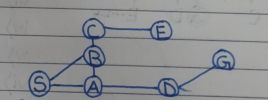


## BRITISH MUSEUM SEARCH

In [26]:
def find_all_paths(adj_matrix, start, goal):
    num_nodes = len(adj_matrix)
    paths = []

    def search(node, current_path):
        current_path.append(node)

        if node == goal:
            paths.append(list(current_path))
        else:
            for neighbor in range(num_nodes):
                if adj_matrix[node][neighbor] == 1 and neighbor not in current_path:
                    search(neighbor, list(current_path))
    search(start, [])

    print(f"Paths from {start} to {goal}:")
    for index, path in enumerate(paths):
        print(f"Path {index + 1}: {path}")


find_all_paths(adj_matrix, 0, 6)

Paths from 0 to 6:
Path 1: [0, 1, 4, 6]
Path 2: [0, 2, 1, 4, 6]


## DEPTH FIRST SEARCH

In [27]:
def depth_first_search(adj_matrix, start, goal):
    visited_nodes = set()
    predecessor = {start: None}
    is_found = [False]
    path = []

    perform_dfs(adj_matrix, start, goal, visited_nodes, predecessor, 0, is_found)

    if is_found[0]:
        path = reconstruct_path(predecessor, start, goal)
        print(f"Path from {start} to {goal}: {path}")
    else:
        print("Goal node not found!")

def perform_dfs(adj_matrix, current_node, goal, visited_nodes, predecessor, depth_level, is_found):
    if current_node not in visited_nodes:
        visited_nodes.add(current_node)

        if current_node == goal:
            is_found[0] = True
            return

        for neighbor in range(len(adj_matrix)):
            if adj_matrix[current_node][neighbor] == 1 and neighbor not in visited_nodes:
                predecessor[neighbor] = current_node
                perform_dfs(adj_matrix, neighbor, goal, visited_nodes, predecessor, depth_level + 1, is_found)

                if is_found[0]:
                    return

def reconstruct_path(predecessor, start, goal):
    path = []
    current = goal
    while current is not None:
        path.append(current)
        current = predecessor[current]
    path.reverse()
    return path


depth_first_search(adj_matrix, 0, 6)

Path from 0 to 6: [0, 1, 4, 6]


## BREADTH FIRST SEARCH

In [28]:
def breadth_first_search(adj_matrix, start, goal):
    visited_nodes = set()
    node_queue = [start]
    depth_level = 0
    predecessor = {start: None}
    goal_found = False

    while node_queue:
        current_level_size = len(node_queue)

        for _ in range(current_level_size):
            current_node = node_queue[0]
            node_queue = node_queue[1:] 
            if current_node not in visited_nodes:
                visited_nodes.add(current_node)

                if current_node == goal:
                    goal_found = True
                    print(f"Goal node {goal} found at level {depth_level}")
                    path = reconstruct_path_bfs(predecessor, start, goal)
                    print(f"Path: {path}")
                    return

                for neighbor in range(len(adj_matrix)):
                    if adj_matrix[current_node][neighbor] == 1 and neighbor not in visited_nodes and neighbor not in node_queue:
                        node_queue.append(neighbor)  
                        predecessor[neighbor] = current_node

        depth_level += 1

    if not goal_found:
        print("Goal node not found!")

def reconstruct_path_bfs(predecessor, start, goal):
    path = []
    current = goal
    while current is not None:
        path.append(current)
        current = predecessor[current]
    path.reverse()  
    return path


breadth_first_search(adj_matrix, 0, 6)


Goal node 6 found at level 3
Path: [0, 1, 4, 6]


In [29]:
heuristic_matrix = [9.5, 7.5, 6, 7.5, 5, 4, 0]

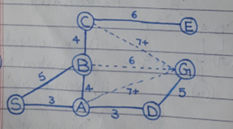

## HILL CLIMBING SEARCH

In [30]:
def hill_climbing_search(adj_matrix, heuristic, start, goal):
    current_node = start
    path = [current_node]

    while current_node != goal:
        neighbors = get_neighbors(adj_matrix, current_node)
        next_node = None
        lowest_heuristic = float('inf')

        for neighbor in neighbors:
            if heuristic[neighbor] < lowest_heuristic:
                lowest_heuristic = heuristic[neighbor]
                next_node = neighbor
        if next_node is None:
            print("No better neighbor found. Stopping search.")
            break

        # Move to the next node
        current_node = next_node
        path.append(current_node)

    if current_node == goal:
        print(f"Goal node {goal} reached.")
        print(f"Path taken: {path}")
    else:
        print("Goal node not reachable from the start node.")

def get_neighbors(adj_matrix, node):
    neighbors = []
    for index in range(len(adj_matrix)):
        if adj_matrix[node][index] == 1:
            neighbors.append(index)
    return neighbors


hill_climbing_search(adj_matrix, heuristic_matrix, 0, 6)


Goal node 6 reached.
Path taken: [0, 2, 1, 4, 6]


## BEAM SEARCH

In [31]:
def beam_search_with_path(adj_matrix, start, goal, heuristic_values, beam_size):
    visited_nodes = set()
    current_level_nodes = [start]
    current_level = 0
    predecessors = {start: None}

    while current_level_nodes:
        visited_nodes.update(current_level_nodes)

        if goal in current_level_nodes:
            print(f"Goal node {goal} found at level {current_level}")
            path = reconstruct_path(predecessors, start, goal)
            print(f"Path: {path}")
            return
        
        next_level_neighbors = []
        for node in current_level_nodes:
            next_level_neighbors.extend(get_neighbors(adj_matrix, node))

        if not next_level_neighbors:
            print("No more nodes to expand, stopping.")
            return
        
        next_level_neighbors = [neighbor for neighbor in next_level_neighbors if neighbor not in visited_nodes]
        next_level_neighbors = sorted(next_level_neighbors, key=lambda n: heuristic_values[n])[:beam_size]

        for neighbor in next_level_neighbors:
            predecessors[neighbor] = current_level_nodes[0]

        current_level_nodes = next_level_neighbors
        current_level += 1  

    print("Goal node not found!")

def get_neighbors(adj_matrix, node):
    neighbors = []
    for index in range(len(adj_matrix)):
        if adj_matrix[node][index] == 1:
            neighbors.append(index)
    return neighbors

def reconstruct_path(predecessors, start, goal):
    path = []
    current = goal
    while current is not None:
        path.append(current)
        current = predecessors[current]
    path.reverse()  
    return path

beam_width = 2
beam_search_with_path(adj_matrix, 0, 6, heuristic_matrix, beam_width)

Goal node 6 found at level 3
Path: [0, 2, 4, 6]


In [32]:
adj_matrix_val = [
    [0, 3, 5, 0, 0, 0, 0],
    [3, 0, 4, 0, 3, 0, 0],
    [5, 4, 0, 4, 0, 0, 0],
    [0, 0, 4, 0, 0, 6, 0],
    [0, 3, 0, 0, 0, 0, 5],
    [0, 0, 6, 0, 0, 0, 0],
    [0, 0, 0, 0, 5, 0, 0],
]

## BRANCH AND BOUND SEARCH

In [33]:
def branch_and_bound(adj_matrix, start, goal):
    visited_nodes = set()
    priority_list = [(0, [start])]

    while priority_list:
        priority_list.sort(key=lambda x: x[0])
        
        cumulative_cost, path = priority_list.pop(0)  
        current_node = path[-1]

        if current_node == goal:
            print(f"Goal node {goal} reached with cost {cumulative_cost}")
            print(f"Path: {path}")
            return

        visited_nodes.add(current_node)


        for neighbor in range(len(adj_matrix)):
            if adj_matrix[current_node][neighbor] > 0 and neighbor not in visited_nodes:
                edge_cost = adj_matrix[current_node][neighbor]
                new_path = path + [neighbor]
                new_cost = cumulative_cost + edge_cost
                priority_list.append((new_cost, new_path))
    
    print("Goal node not found!")

branch_and_bound(adj_matrix_val, 0, 6)


Goal node 6 reached with cost 11
Path: [0, 1, 4, 6]


## BRANCH AND BOUND WITH EXTENDED LIST SEARCH

In [34]:
def branch_and_bound_extd(adj_matrix, start, goal):
    dead_horse = set()
    priority_list = [(0, [start])]

    while priority_list:
        # Sort priority_list by cost using simple bubble sort
        for i in range(len(priority_list)):
            for j in range(0, len(priority_list) - i - 1):
                if priority_list[j][0] > priority_list[j + 1][0]:
                    priority_list[j], priority_list[j + 1] = priority_list[j + 1], priority_list[j]

        total_cost, current_path = priority_list.pop(0)
        current_node = current_path[-1]

        if current_node == goal:
            print(f"Goal node {goal} reached with total cost {total_cost}")
            print(f"Path: {current_path}")
            return

        dead_horse.add(current_node)

        for neighbor in range(len(adj_matrix)):
            if adj_matrix[current_node][neighbor] > 0 and neighbor not in dead_horse:
                cost_to_neighbor = adj_matrix[current_node][neighbor]
                new_path = current_path + [neighbor]
                new_total_cost = total_cost + cost_to_neighbor
                priority_list.append((new_total_cost, new_path))

    print("Goal node not found!")

branch_and_bound_extd(adj_matrix_val, 0, 6)


Goal node 6 reached with total cost 11
Path: [0, 1, 4, 6]


## BRANCH AND BOUND WITH HEURISTICS SEARCH

In [35]:
def branch_and_bound_heuristic(adj_matrix, start, goal, heuristic_vals):
    explored = set()
    priority_list = [(heuristic_vals[start], 0, [start])]

    while priority_list:
        for i in range(len(priority_list)):
            for j in range(0, len(priority_list) - i - 1):
                if priority_list[j][0] > priority_list[j + 1][0]:
                    priority_list[j], priority_list[j + 1] = priority_list[j + 1], priority_list[j]

        f_value, total_cost, current_path = priority_list.pop(0)
        current_node = current_path[-1]

        if current_node == goal:
            print(f"Goal node {goal} reached with total cost {total_cost}")
            print(f"Path: {current_path}")
            return

        explored.add(current_node)

        for neighbor in range(len(adj_matrix)):
            if adj_matrix[current_node][neighbor] > 0 and neighbor not in explored:
                cost_to_neighbor = adj_matrix[current_node][neighbor]
                new_cost = total_cost + cost_to_neighbor
                f_value_new = new_cost + heuristic_vals[neighbor]
                new_path = current_path + [neighbor]
                priority_list.append((f_value_new, new_cost, new_path))

    print("Goal node not found!")
branch_and_bound_heuristic(adj_matrix_val, 0, 6, heuristic_matrix)

Goal node 6 reached with total cost 11
Path: [0, 1, 4, 6]


## A STAR SEARCH

In [36]:
def a_star_algorithm(adj_matrix, start, goal, heuristic_vals):
    visited_set = set()
    priority_list = [(heuristic_vals[start], 0, [start])]

    while priority_list:
        for i in range(len(priority_list)):
            for j in range(0, len(priority_list) - i - 1):
                if priority_list[j][0] > priority_list[j + 1][0]:
                    priority_list[j], priority_list[j + 1] = priority_list[j + 1], priority_list[j]

        f_cost, g_cost, current_path = priority_list.pop(0)
        current_node = current_path[-1]

        if current_node == goal:
            print(f"Goal node {goal} reached with total cost {g_cost}")
            print(f"Path: {current_path}")
            return

        visited_set.add(current_node)

        for neighbor in range(len(adj_matrix)):
            if adj_matrix[current_node][neighbor] > 0 and neighbor not in visited_set:
                edge_cost = adj_matrix[current_node][neighbor]
                new_g_cost = g_cost + edge_cost
                new_f_cost = new_g_cost + heuristic_vals[neighbor]
                new_path = current_path + [neighbor]
                priority_list.append((new_f_cost, new_g_cost, new_path))

    print("Goal node not found!")

heuristic_values = [9.5, 7.5, 6, 7.5, 5, 4, 0]

a_star_algorithm(adj_matrix_val, 0, 6, heuristic_values)


Goal node 6 reached with total cost 11
Path: [0, 1, 4, 6]


## BEST FIRST SEARCH

In [37]:
def best_first(adj_matrix, start, goal, heuristic):
    visited_set = set()
    priority_list = [(heuristic[start], [start])]

    while priority_list:
        priority_list.sort(key=lambda x: x[0])
        h_value, current_path = priority_list.pop(0)
        current_node = current_path[-1]

        if current_node == goal:
            print(f"Goal node {goal} reached with path: {current_path}")
            return

        visited_set.add(current_node)

        for neighbor in range(len(adj_matrix)):
            if adj_matrix[current_node][neighbor] > 0 and neighbor not in visited_set:
                new_path = current_path + [neighbor]
                priority_list.append((heuristic[neighbor], new_path))

    print("Goal node not found!")

heuristic_values = [9.5, 7.5, 6, 7.5, 5, 4, 0]
best_first(adj_matrix_val, 0, 6, heuristic_values)


Goal node 6 reached with path: [0, 1, 4, 6]
